### Importación de datos



In [84]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [85]:
pip install matplotlib


In [86]:
import matplotlib.pyplot as plt
import numpy as np

#1. Análisis de facturación



In [131]:
# Calculamos la facturación de cada tienda #

tienda['Precio'].sum()
print (f'\nLa facturación de la tienda 1 es de: ${tienda["Precio"].sum():,.2f}')
tienda2['Precio'].sum()
print (f'\nLa facturación de la tienda 2 es de: ${tienda2["Precio"].sum():,.2f}')
tienda3['Precio'].sum()
print (f'\nLa facturación de la tienda 3 es de: ${tienda3["Precio"].sum():,.2f}')
tienda4['Precio'].sum()
print (f'\nLa facturación de la tienda 4 es de: ${tienda4["Precio"].sum():,.2f}')
print (f'\nLa facturación total de las tiendas es de: ${total_precio_tienda:,.2f}')

# Ahora vamos a colocar una gráfica que nos ayude a visualizar las ventas de forma más eficaz #



La facturación de la tienda 1 es de: $1,150,880,400.00

La facturación de la tienda 2 es de: $1,116,343,500.00

La facturación de la tienda 3 es de: $1,098,019,600.00

La facturación de la tienda 4 es de: $1,038,375,700.00

La facturación total de las tiendas es de: $4,403,619,200.00


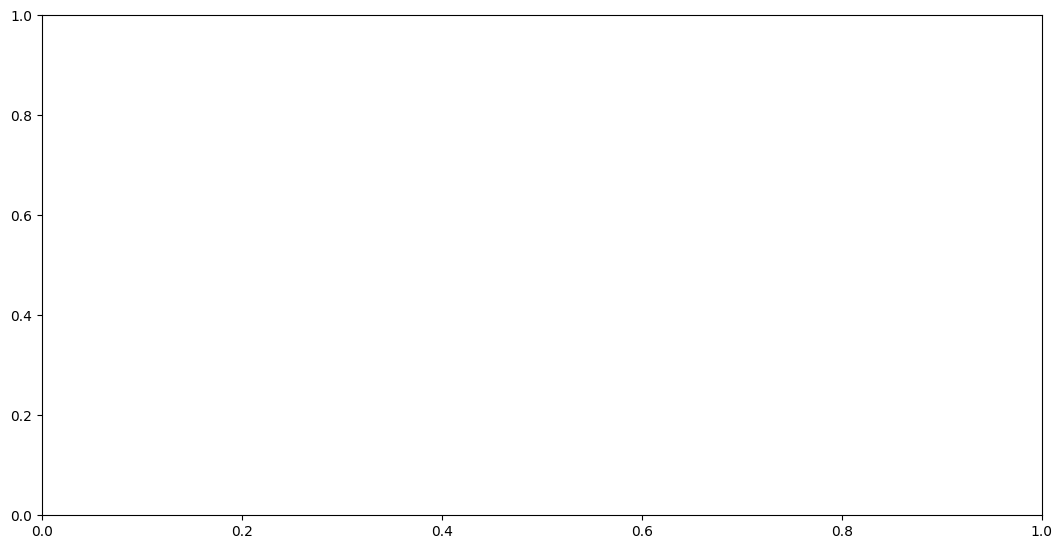

np.float64(4403619200.0)

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda